# KNN method to classify speaker

<h3> Preprocess data

Import packages:  
pyAudioAnalysis can provide feature extraction functions to extract MFCCs

In [26]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

We use short-term feature extraction.  
It splits the input signal into short-term widnows (frames) and computes a number of features for each frame.  
This process leads to a sequence of short-term feature vectors for the whole signal.

For speakers from 3 different region (Mandarin, Spanish, English), we combine all the features extracted from the sound file and label them into one csv file (dataset.csv)  
Label are as follows:  
English - 1  
Mandarin - 2  
Spanish - 3


In [50]:
# preprocessing the sound file and label it (English)
path = "unified/eng/"
directory = os.fsencode(path)

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".mp3.wav"):
        # process each sound file individually, read audio file
        [Fs, x] = audioBasicIO.readAudioFile("unified/eng/"+filename);
        # extract the short term feature sequences for an audio signal, 
        # using a frame size of 50 msecs and a frame step of 25 msecs (50% overlap)
        F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);
        df = pd.DataFrame()
        df['label'] = []
        for i in range(0,22):
            df[f_names[i]] = F[i,:]
            df['label'] = '1'
        with open('dataset.csv', 'a') as f:
            df.to_csv(f, header=False)

     else:
         continue

In [51]:
# preprocessing the sound file and label it (Mandarin)
path = "unified/man/"
directory = os.fsencode(path)

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".mp3.wav"):
        [Fs, x] = audioBasicIO.readAudioFile("unified/man/"+filename);
        F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);
        df = pd.DataFrame()
        df['label'] = []
        for i in range(0,22):
            df[f_names[i]] = F[i,:]
            df['label'] = '2'
        with open('dataset.csv', 'a') as f:
            df.to_csv(f, header=False)

     else:
         continue

In [52]:
# preprocessing the sound file and label it (Spanish)
path = "unified/span/"
directory = os.fsencode(path)

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".mp3.wav"):
        [Fs, x] = audioBasicIO.readAudioFile("unified/span/"+filename);
        F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);
        df = pd.DataFrame()
        df['label'] = []
        for i in range(0,22):
            df[f_names[i]] = F[i,:]
            df['label'] = '3'
        with open('dataset.csv', 'a') as f:
            df.to_csv(f, header=False)

     else:
         continue

<h3> This is a sample table for the features extracted:

 We have chose 23 features in total:  
 1 - Zero Crossing Rate  
 2 - Energy  
 3 - Entropy of Energy  
 4 - Spectral Centroid  
 5 - Spectral Spread  
 6 - Spectral Entropy  
 7 - Spectral Flux  
 8 - Spectral Rolloff  
 9-21 - MFCCs
 
 
 

In [89]:
df = pd.DataFrame()
df['label'] = []
for i in range(0,21):
    df[f_names[i]] = F[i,:]
    df['label'] = '1'
#     print(df[f_names[i]])
 
df.head(5)

,label,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1,0.317893,0.000175,3.054653,0.287673,0.146611,1.744725,0.000000,0.397459,-30.476846,...,-0.310783,0.399976,-0.026325,0.150470,0.104604,0.139319,-0.028614,0.007746,0.056013,-0.073690
1,1,0.314260,0.000355,2.193436,0.290566,0.153771,2.013830,0.002654,0.404719,-29.394962,...,-1.078112,-0.019903,-0.169868,0.673619,0.103392,0.325613,0.002551,0.564640,0.108138,-0.028476
2,1,0.316076,0.001097,2.791168,0.329879,0.175049,1.969532,0.002199,0.413793,-28.992452,...,-1.479832,-0.364813,-0.058583,0.566052,0.141539,0.618688,0.141273,0.575923,0.117765,0.052612
3,1,0.341508,0.001720,3.246772,0.315275,0.135083,1.770024,0.002143,0.411978,-29.092591,...,-1.574239,-0.393448,0.000549,0.543085,0.163311,0.659592,-0.059611,0.482805,0.027010,0.102170
4,1,0.361490,0.001219,3.077556,0.348398,0.166944,1.694709,0.002031,0.413793,-29.612030,...,-1.164019,-0.336770,-0.257249,0.372231,0.196421,0.551368,-0.263506,0.347963,-0.002334,0.043832


<h3> KNN

Import packages:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

Read file and create dataframe, create training and testing data

Firstly, we used all 22 features extracted from the audio

In [56]:
df = pd.read_csv('dataset.csv',index_col = 0)
x = df[['zcr','energy','energy_entropy','spectral_centroid','spectral_spread','spectral_entropy','spectral_flux','spectral_rolloff','mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9','mfcc_10','mfcc_11','mfcc_12','mfcc_13','chroma_1']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Build KNN Classifier and fit in the model, print the prediction accuracy

We compared different prediction accuracy with different numbers of neighbours (3, 5, 7, 10)

In [90]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6196532999164578


In [59]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6281119465329992


In [61]:

from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.63244917850181


In [62]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6361180729601782


It seems that the prediction accuracy are pretty much the same and around 0.63. Hower, with number of neighbors increase, the prediction accuracy slightly increases too.

Then we only use mfcc features to train the data to see if there is any difference

In [64]:
x = df[['mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9','mfcc_10','mfcc_11','mfcc_12','mfcc_13']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6235588972431078


In [65]:
x = df[['mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9','mfcc_10','mfcc_11','mfcc_12','mfcc_13']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6232873851294904


In [66]:
from sklearn.metrics import classification_report
target_names = ['English(US)', 'Spanish', 'Mandarin']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 English(US)       0.66      0.87      0.75     89296
     Spanish       0.40      0.11      0.18     15561
    Mandarin       0.45      0.26      0.33     38783

    accuracy                           0.62    143640
   macro avg       0.50      0.41      0.42    143640
weighted avg       0.58      0.62      0.58    143640



It seems there is no such a big difference between using 22 features and 13 mfcc features

To optimize our model we try to normalize the input data:

In [78]:
def normalize(x):
    return (x-x.mean())/x.std()

In [85]:
# normalize mfcc features
dataframe = pd.read_csv('dataset.csv',index_col = 0)
x = dataframe[['mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9','mfcc_10','mfcc_11','mfcc_12','mfcc_13']]
normalized_x = pd.DataFrame()
count = 1
for i in x:
    i = normalize(dataframe[i])
    normalized_x["mfcc"+ str(count)] = i
    count = count + 1

normalized_x.head(10)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,-1.366721,-1.092069,-0.014589,1.673276,1.689741,0.498789,0.098053,0.711796,0.709506,0.203857,0.143414,0.937126,0.976330
1,-1.270844,-0.978530,0.132655,1.527600,1.234789,0.603791,0.326731,1.600346,0.331231,-0.190566,-0.257535,0.723589,0.667438
2,-1.279251,-1.086657,-0.022859,1.074859,0.817529,0.501960,0.511110,0.948588,0.028872,-0.248314,-0.264864,0.844052,-0.036431
3,-1.377505,-1.026755,-0.088889,1.001777,1.066652,0.437346,0.444312,0.748578,0.550123,0.445194,0.542568,1.509753,0.688372
4,-1.436626,-0.865647,0.091126,1.135194,0.953060,0.470755,0.117077,0.961370,0.902763,0.153268,0.745510,1.139576,1.218763
5,-1.471196,-0.974707,0.252347,1.405756,0.824157,0.042115,-0.331951,0.352664,0.612725,0.463939,0.391719,0.991807,0.845736
6,-1.449797,-0.722354,0.024903,1.514353,1.350594,0.679278,0.662948,0.608575,0.414390,0.436025,0.692049,1.277221,0.787689
7,-1.639612,-0.761026,0.160842,1.606279,1.459162,0.600331,0.600508,0.763964,-0.224947,-0.072366,0.984137,1.199470,0.832116
8,-1.714263,-0.951005,0.052317,1.361294,1.262125,0.843315,-0.014770,0.674308,-0.340387,-0.213699,0.702508,1.160154,0.911240
9,-1.552914,-0.987817,0.078971,1.108526,0.782073,0.700300,1.082980,1.497345,0.573797,0.119164,0.578165,1.367355,1.217061


Show the table that contains 478800 entries of data

In [94]:
dataframe.describe()

,label,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1
count,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,4.788000e+05,478800.000000,478800.000000,478800.000000,...,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,478800.000000,4.788000e+05
mean,1.648333,0.138316,0.012083,3.072952,0.214487,0.200836,8.287646e-01,0.006608,0.206260,-26.793379,...,-0.323530,0.053969,-0.073894,-0.008552,-0.095378,-0.071741,-0.113041,-0.057503,-0.105271,2.034716e-02
std,0.876355,0.147643,0.018931,0.228431,0.131248,0.049075,7.668584e-01,0.007056,0.238092,2.420032,...,0.554736,0.465873,0.415311,0.362158,0.343331,0.327139,0.316236,0.319651,0.314870,3.515638e-02
min,1.000000,0.000000,0.000004,0.333757,0.003172,0.030122,7.503214e-07,0.000000,0.000000,-47.762011,...,-3.267421,-2.172960,-2.060405,-1.943886,-1.837495,-1.782610,-1.714220,-1.662052,-1.764887,2.274218e-11
25%,1.000000,0.047230,0.001421,2.986923,0.127713,0.166846,2.111611e-01,0.003090,0.045372,-28.399418,...,-0.690973,-0.255144,-0.350322,-0.241125,-0.318435,-0.277326,-0.306589,-0.250215,-0.294183,2.434024e-03
50%,1.000000,0.076294,0.005154,3.145891,0.164899,0.196857,5.521587e-01,0.005025,0.090744,-26.552168,...,-0.311706,0.049421,-0.067579,0.001638,-0.082891,-0.059318,-0.093479,-0.037107,-0.084058,6.756622e-03
75%,3.000000,0.158038,0.014707,3.233517,0.254569,0.230491,1.247080e+00,0.008010,0.261343,-25.010996,...,0.053639,0.353329,0.204030,0.233180,0.137778,0.145825,0.099508,0.153462,0.101314,2.042029e-02
max,3.000000,0.897366,0.619221,3.321075,0.833006,0.400802,3.271169e+00,0.445985,0.965517,-20.293946,...,2.297223,2.377265,2.052533,2.107679,1.532954,1.954015,1.710319,1.778261,1.557266,3.261622e-01


In [86]:
y = dataframe['label']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, stratify=y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.632010582010582


In [88]:
from sklearn.metrics import classification_report
target_names = ['English(US)', 'Spanish', 'Mandarin']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 English(US)       0.67      0.87      0.76     89296
     Spanish       0.43      0.13      0.20     15561
    Mandarin       0.47      0.27      0.35     38783

    accuracy                           0.63    143640
   macro avg       0.52      0.43      0.44    143640
weighted avg       0.59      0.63      0.59    143640



In [95]:
x = dataframe[['mfcc_1','mfcc_2','mfcc_3','mfcc_4','mfcc_5','mfcc_6','mfcc_7','mfcc_8','mfcc_9','mfcc_10','mfcc_11','mfcc_12','mfcc_13']]
normalized_x = pd.DataFrame()
count = 1
for i in x:
    i = normalize(dataframe[i])
    normalized_x["mfcc"+ str(count)] = i
    count = count + 1
y = dataframe['label']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.15)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6360763018657756


Now we compare the model with normalized input with the unnormalized input, prediction accuracy is still very similar

We also tried to split the test data by audio file, for example, we find each audio file extracts 798 data records, we split the test data by 30% of English,Mandarin,Spanish audio files, so 112,19,49 files will be taken as test audio files, that's 180 in total. 

In [113]:
eng_x_test = normalized_x.iloc[0:89376]
eng_x_train = normalized_x.iloc[89376:297654]
man_x_test = normalized_x.iloc[297654:312816]
man_x_train = normalized_x.iloc[312816:349524]
span_x_test = normalized_x.iloc[349524:388626]
span_x_train = normalized_x.iloc[388626:478800]
print(span_x_train) 

        mfcc1     mfcc2     mfcc3     mfcc4     mfcc5     mfcc6     mfcc7  \
0   -0.172904  0.984969  0.910135  0.956940 -1.463915 -0.856273  0.767871   
1    0.564196  0.447614  0.377670  0.307957 -1.485418 -0.776060  0.296891   
2    0.543723  0.545370  0.898581  0.794602 -1.879760 -0.382586 -0.119853   
3    0.633786  0.334014  1.081994  0.238636 -1.226101  0.180228 -0.615795   
4    0.444130  0.245998  1.433295  0.073945 -0.758072  0.605848  0.058155   
5    0.252314  0.508330  1.785225 -0.698013 -1.205473 -0.480411 -0.878064   
6    0.136066  0.107140  0.926715 -0.171600  0.178284  0.040163 -0.612684   
7   -0.727852 -0.060058  1.411944  0.412422 -0.971629  0.348483 -0.255636   
8   -0.648311 -0.692491  0.031363  0.185709 -0.824808 -0.208398 -0.029135   
9   -0.760560 -0.659546  0.029595  1.554505 -0.309935  0.295719  0.796292   
10  -0.585475 -0.374795 -1.092678  0.856990 -0.920616  0.079916  1.866051   
11   0.205345  0.738155 -1.646673 -0.142941 -0.194923 -0.808480  2.858714   

In [121]:
X_train = normalized_x.iloc[np.r_[89376:297654, 312816:349524, 388626:478800 ]]
y_train = y.iloc[np.r_[89376:297654, 312816:349524, 388626:478800 ]]
X_test = normalized_x.iloc[np.r_[0:89376, 297654:312816, 349524:388626 ]]
y_test = y.iloc[np.r_[0:89376, 297654:312816, 349524:388626 ]]


We will find the prediciton of each time segment, then take the mode of the entire time frame of the audio file to determine the label.

In [139]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_realtest = []
y_pred = []
for i in range(0,180):
    y_predpiece = knn.predict(X_test.iloc[(i*797):(i*797+797)])
    counts = np.bincount(y_predpiece)
    # get mode
    y_predmode = np.argmax(counts)
#     print(y_predmode)
    y_pred.append(y_predmode)
    y_realtest.append(y_test.iloc[i*797])
print("Accuracy:",metrics.accuracy_score(y_realtest, y_pred))

Accuracy: 0.6277777777777778


In [140]:
print(y_realtest)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [141]:
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [142]:
from sklearn.metrics import classification_report
target_names = ['English(US)', 'Spanish', 'Mandarin']
print(classification_report(y_realtest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 English(US)       0.63      1.00      0.77       113
     Spanish       0.00      0.00      0.00        19
    Mandarin       0.00      0.00      0.00        48

    accuracy                           0.63       180
   macro avg       0.21      0.33      0.26       180
weighted avg       0.39      0.63      0.48       180



/home/tang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


However, we still find the accuracy remains the same

As above, we find that all the test y are classified into english label so we wonder if the English audio file are too many. So we average the number of audio file to take 19 test audio files from each language region and 46 training audio files.

In [149]:
eng_x_test = normalized_x.iloc[0:15162]
eng_x_train = normalized_x.iloc[15162:51870]
man_x_test = normalized_x.iloc[297654:312816]
man_x_train = normalized_x.iloc[312816:349524]
span_x_test = normalized_x.iloc[349524:364686]
span_x_train = normalized_x.iloc[364686:401394]


In [150]:
X_train = normalized_x.iloc[np.r_[15162:51870, 312816:349524, 364686:401394 ]]
y_train = y.iloc[np.r_[15162:51870, 312816:349524, 364686:401394 ]]
X_test = normalized_x.iloc[np.r_[0:15162, 297654:312816, 349524:364686 ]]
y_test = y.iloc[np.r_[0:15162, 297654:312816, 349524:364686 ]]


In [156]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_realtest = []
y_pred = []
for i in range(0,57):
    y_predpiece = knn.predict(X_test.iloc[(i*797):(i*797+797)])
    counts = np.bincount(y_predpiece)
    # get mode
    y_predmode = np.argmax(counts)
#     print(y_predmode)
    y_pred.append(y_predmode)
    y_realtest.append(y_test.iloc[i*797])
print("Accuracy:",metrics.accuracy_score(y_realtest, y_pred))

Accuracy: 0.40350877192982454


In [158]:
print(y_realtest)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [159]:
print(y_pred)

[2, 2, 2, 1, 2, 3, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1, 1, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2, 1, 3]


In [154]:
from sklearn.metrics import classification_report
target_names = ['English(US)', 'Spanish', 'Mandarin']
print(classification_report(y_realtest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 English(US)       0.41      0.65      0.50        20
     Spanish       0.38      0.32      0.34        19
    Mandarin       0.44      0.22      0.30        18

    accuracy                           0.40        57
   macro avg       0.41      0.40      0.38        57
weighted avg       0.41      0.40      0.38        57



We found the accuracy are even lower than before

              precision    recall  f1-score   support

     English       0.63      0.98      0.77     98093
    Mandarin       0.52      0.03      0.05     17245
     Spanish       0.52      0.07      0.12     42666

    accuracy                           0.63    158004
   macro avg       0.56      0.36      0.31    158004
weighted avg       0.59      0.63      0.52    158004



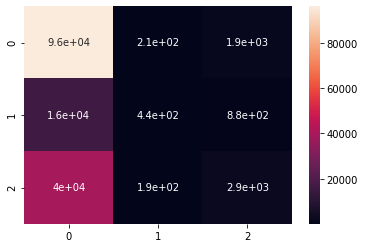

In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33)
xgb_c = XGBClassifier(max_depth=10, n_estimators=100, n_jobs=-1, num_class=3, subsample=0.6) 
xgb_c.fit(X_train, y_train.ravel())
y_pred = xgb_c.predict(X_test) ##predict

y_true = y_test
target_names = ['English', 'Mandarin', 'Spanish']
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot=True)